In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns


In [2]:
gdp_df= pd.read_csv('../data/gdp_percapita.csv')

In [3]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


In [4]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN
7661,Zimbabwe,1990,2704.757299,NaN


How many rows and columns are in `gdp_df`? What are the data types of each column? 'Country', 'Year', and 'GDP_Per_Capita'.

In [6]:
gdp_df.shape

(7662, 4)

In [7]:
print(gdp_df.dtypes)

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object


In [8]:
gdp_df=gdp_df.drop(columns = ['Value Footnotes'])

In [9]:
gdp_df=gdp_df.rename(columns= {'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})

In [10]:
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

In [55]:
country_count=gdp_df['Country'].value_counts().to_frame().reset_index()

In [57]:
country_count

,Country,count
0,Least developed countries: UN classification,33
1,Middle East & North Africa,33
2,Middle East & North Africa (IDA & IBRD),33
3,Middle income,33
4,Mongolia,33
...,...,...
237,Kosovo,15
238,Sint Maarten (Dutch part),14
239,Turks and Caicos Islands,12
240,Somalia,10


Countries having data for all years

In [85]:
country_count.loc[country_count['count'] == 33]

,Country,count
0,Least developed countries: UN classification,33
1,Middle East & North Africa,33
2,Middle East & North Africa (IDA & IBRD),33
3,Middle income,33
4,Mongolia,33
...,...,...
197,Finland,33
198,Europe & Central Asia (excluding high income),33
199,Ghana,33
200,Euro area,33


7.Which countries are missing many years of data

In [87]:
country_count.loc[country_count['count'] < 20]

,Country,count
235,Nauru,19
236,Cayman Islands,16
237,Kosovo,15
238,Sint Maarten (Dutch part),14
239,Turks and Caicos Islands,12
240,Somalia,10
241,Djibouti,10


8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [95]:
gdp_df_2020=gdp_df.loc[gdp_df['Year'] ==2020]

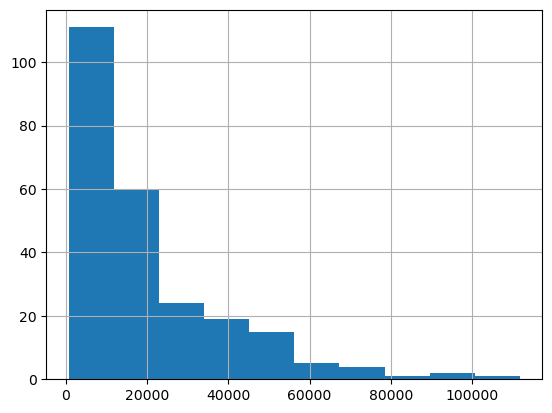

In [101]:
gdp_df_2020.GDP_Per_Capita.hist();

In [105]:
gdp_df_2020.describe()

,Year,GDP_Per_Capita
count,242.0,242.000000
mean,2020.0,19586.754446
std,0.0,19640.401631
min,2020.0,711.355263
25%,2020.0,4961.408532
50%,2020.0,13357.997573
75%,2020.0,27064.125293
max,2020.0,111751.314751


9. What was the median GDP per capita value in 2020?

13357.997573

In [111]:
gdp_df_2020.GDP_Per_Capita.median()

13357.997573370474

10.For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)

In [121]:
decades= [1990,2000,2010,2020]

In [151]:
gdp_decades=gdp_df.loc[gdp_df.Year.isin(decades)].reset_index()

In [153]:
gdp_decades

,index,Country,Year,GDP_Per_Capita
0,1,Afghanistan,2020,1968.341002
1,11,Afghanistan,2010,2026.163818
2,22,Africa Eastern and Southern,2020,3455.023119
3,32,Africa Eastern and Southern,2010,3513.315920
4,42,Africa Eastern and Southern,2000,2897.140841
...,...,...,...,...
916,7628,Zambia,1990,2290.039226
917,7631,Zimbabwe,2020,1990.319419
918,7641,Zimbabwe,2010,1799.540233
919,7651,Zimbabwe,2000,2750.601236


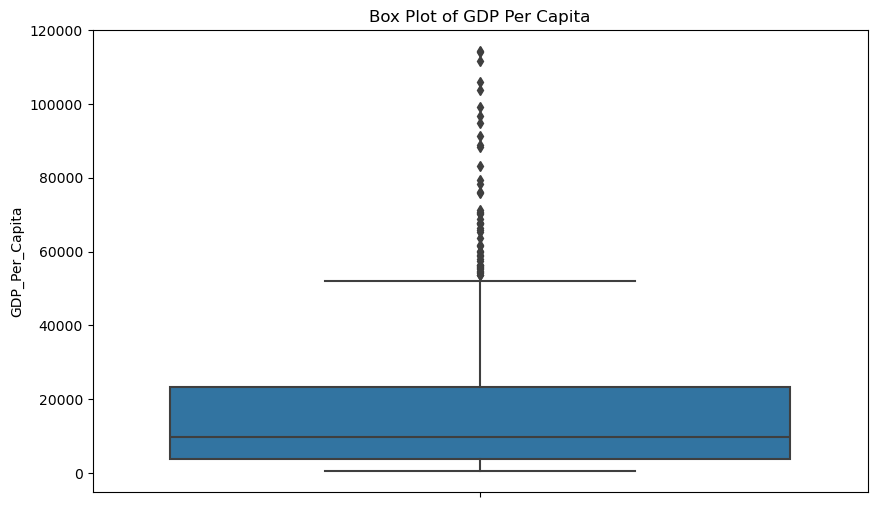

In [155]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=gdp_decades, y='GDP_Per_Capita') 
plt.title('Box Plot of GDP Per Capita')
plt.ylabel('GDP_Per_Capita')
plt.show()

Text(0.5, 1.0, 'GDP_Per_Capita by Year')

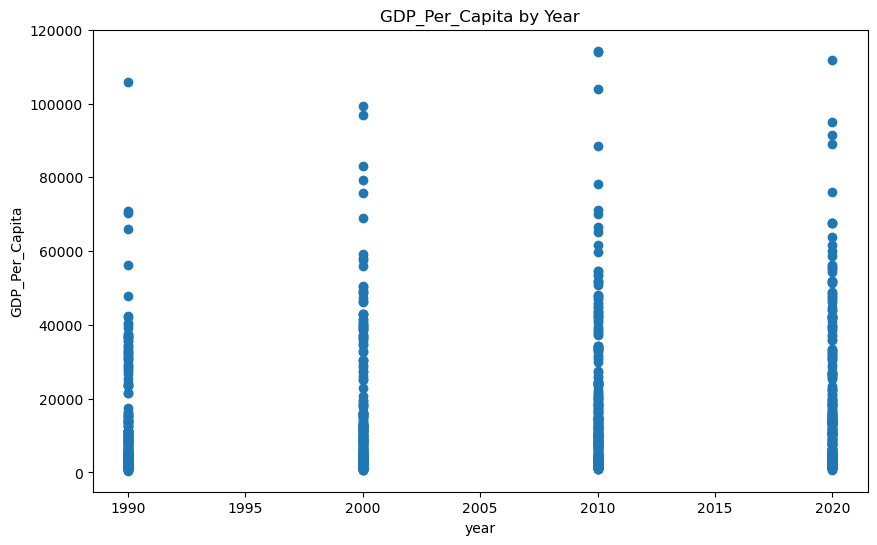

In [542]:
plt.figure(figsize=(10, 6))
plt.scatter(x = 'Year', y ='GDP_Per_Capita', data = gdp_decades)
plt.xlabel('year')
plt.ylabel('GDP_Per_Capita')
plt.title('GDP_Per_Capita by Year')

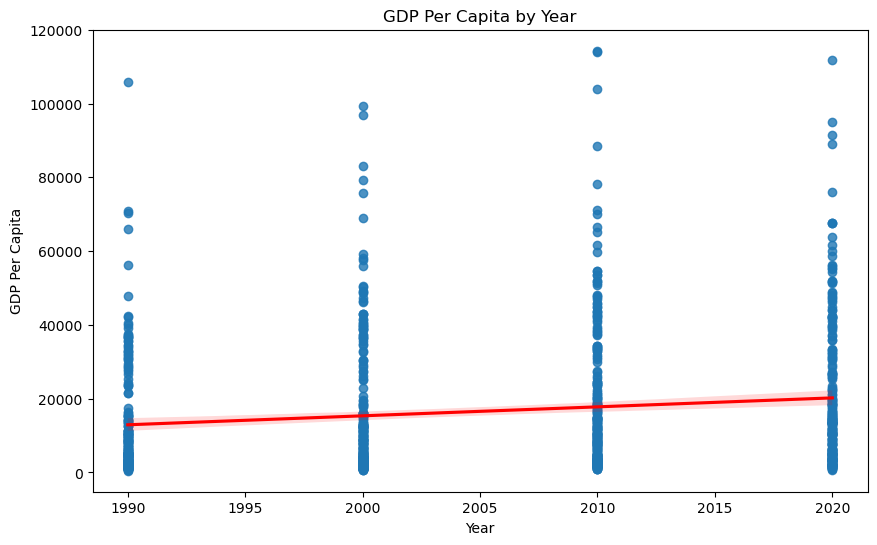

In [164]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Year', y='GDP_Per_Capita', data=gdp_decades, line_kws={'color':'red'})
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.title('GDP Per Capita by Year')
plt.show()

11. Which country was the first to have a GDP per capita greater than $100,000? A. United Arab Emirates


In [174]:
high_gdp=gdp_df.loc[gdp_df['GDP_Per_Capita']>100000]

In [190]:
sorted_high_gdp = high_gdp.sort_values('Year')

In [192]:
sorted_high_gdp.head(1)

,Country,Year,GDP_Per_Capita
7302,United Arab Emirates,1990,105893.626059


In [199]:
high_gdp.nsmallest(1, 'Year')

,Country,Year,GDP_Per_Capita
7302,United Arab Emirates,1990,105893.626059


12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. A.Luxembourg

In [204]:
gdp_df.loc[gdp_df['Year']==2020].nlargest(1, 'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
4148,Luxembourg,2020,111751.314751


In [208]:
gdp_luxembourg=gdp_df.loc[gdp_df['Country']=='Luxembourg']

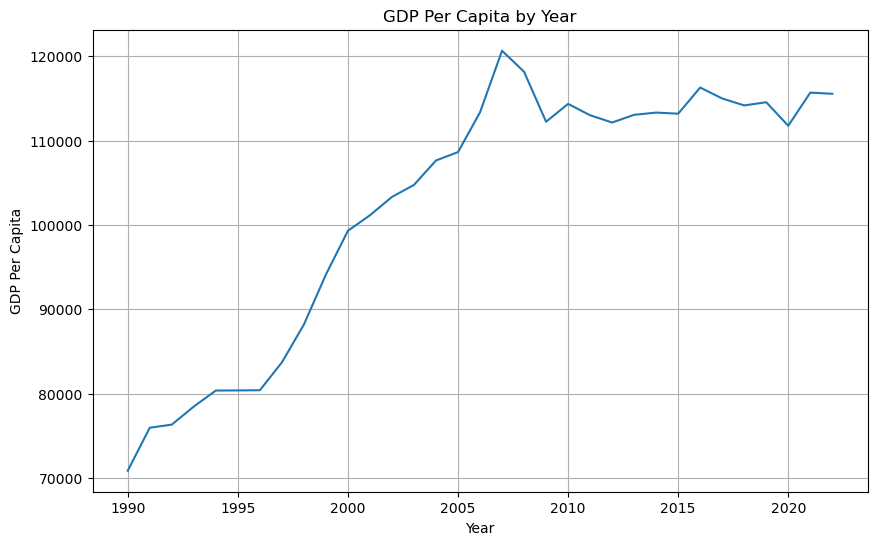

In [216]:
plt.figure(figsize=(10, 6))
plt.plot(gdp_luxembourg['Year'], gdp_luxembourg['GDP_Per_Capita'])
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.title('GDP Per Capita by Year')

plt.grid(True)
plt.show();

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. 

In [218]:
gdp_df.loc[gdp_df['Year']==2020].nsmallest(1, 'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
973,Burundi,2020,711.355263


In [230]:
gdp_burundi=gdp_df.loc[gdp_df['Country']=='Burundi']

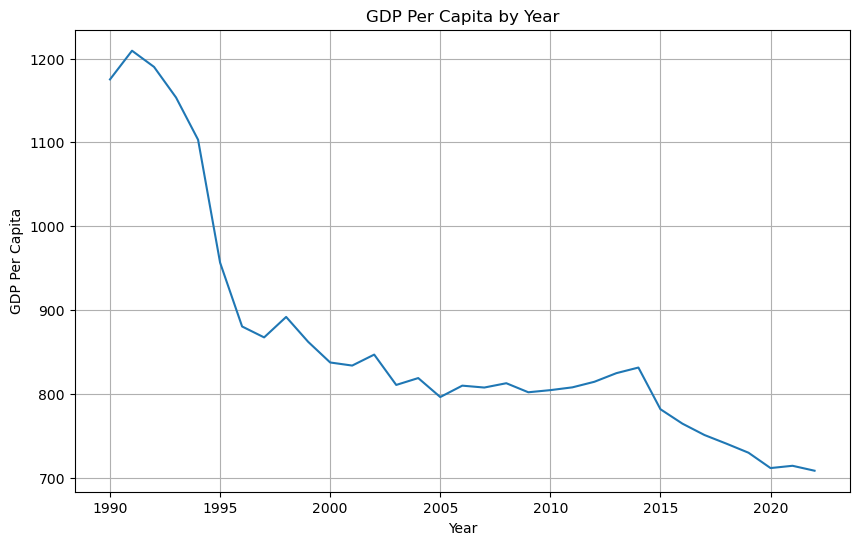

In [234]:
plt.figure(figsize=(10, 6))
plt.plot(gdp_burundi['Year'], gdp_burundi['GDP_Per_Capita'])
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.title('GDP Per Capita by Year')

plt.grid(True)
plt.show();

**Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990?  Yes

In [284]:
gdp_2020=gdp_df.loc[gdp_df['Year']==2020]

In [286]:
gdp_1990=gdp_df.loc[gdp_df['Year']==1990]

In [288]:
gdp_2020 = gdp_2020.rename(columns={'Year': 'Year20'})

In [290]:
gdp_1990 = gdp_1990.rename(columns={'Year': 'Year90'})

In [292]:
gdp_2020_1990 = pd.merge(gdp_1990,gdp_2020, 
                               on = 'Country',
                               how = 'inner')

In [298]:
gdp_2020_1990

,Country,Year90,GDP_Per_Capita_x,Year20,GDP_Per_Capita_y
0,Africa Eastern and Southern,1990,3037.297466,2020,3455.023119
1,Africa Western and Central,1990,2788.301039,2020,3957.933804
2,Albania,1990,4827.027705,2020,13278.369769
3,Algeria,1990,8828.874473,2020,10844.770764
4,Angola,1990,5793.084512,2020,6029.691895
...,...,...,...,...,...
202,Vanuatu,1990,2774.138350,2020,2848.970240
203,Viet Nam,1990,2099.394649,2020,10450.622382
204,World,1990,9705.981267,2020,16204.169107
205,Zambia,1990,2290.039226,2020,3183.650773


Which countries had lower GDP per capita in 2020 than in 1990?

In [300]:
gdp_2020_1990.loc[gdp_2020_1990['GDP_Per_Capita_x']>gdp_2020_1990['GDP_Per_Capita_y']]

,Country,Year90,GDP_Per_Capita_x,Year20,GDP_Per_Capita_y
15,Barbados,1990,14097.395550,2020,13805.777541
25,Brunei,1990,70358.724094,2020,61603.550804
28,Burundi,1990,1175.155086,2020,711.355263
34,Central African Republic,1990,1200.613390,2020,847.765012
41,Congo,1990,5007.319245,2020,3384.654335
45,Dem. Rep. Congo,1990,1750.169739,2020,1044.071214
66,Fragile and conflict affected situations,1990,4864.814075,2020,4357.621312
68,Gabon,1990,17559.006114,2020,13903.288955
76,Guinea-Bissau,1990,1998.173206,2020,1803.630591
78,Haiti,1990,3612.815105,2020,2970.462845


14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [422]:
try:
    internet_df = pd.read_csv('../data/internet_use.csv', on_bad_lines='warn', delimiter=',', encoding='utf-8')
except Exception as e:
    print(f"Error: {e}")
    
internet_df.head()

Skipping line 6378: expected 4 fields, saw 6



,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.60,1
1,Afghanistan,2018,16.80,2
2,Afghanistan,2017,13.50,3
3,Afghanistan,2016,11.00,4
4,Afghanistan,2015,8.26,4


In [424]:
internet_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.60,1
1,Afghanistan,2018,16.80,2
2,Afghanistan,2017,13.50,3
3,Afghanistan,2016,11.00,4
4,Afghanistan,2015,8.26,4


In [314]:
internet_df.tail()

,Country or Area,Year,Value,Value Footnotes
6375,293,Estimated based on Survey's results. Populatio...,NaN,NaN
6376,294,Preliminary. Country estimate.,NaN,NaN
6377,295,18+. ITU estimate.,NaN,NaN
6378,296,ICT survey. Population age 11+,NaN,NaN
6379,297,Internet users aged 3 years and above who used...,NaN,NaN


In [318]:
internet_df.dtypes

Country or Area     object
Year                object
Value              float64
Value Footnotes     object
dtype: object

Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [426]:
internet_df=internet_df.drop(columns = ['Value Footnotes'])

In [428]:
internet_df=internet_df.rename(columns= {'Country or Area': 'Country', 'Value': 'Internet_Users_Pct'})

In [430]:
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.60
1,Afghanistan,2018,16.80
2,Afghanistan,2017,13.50
3,Afghanistan,2016,11.00
4,Afghanistan,2015,8.26
...,...,...,...
6375,293,Estimated based on Survey's results. Populatio...,NaN
6376,294,Preliminary. Country estimate.,NaN
6377,295,18+. ITU estimate.,NaN
6378,296,ICT survey. Population age 11+,NaN


In [432]:
internet_df=internet_df[0:6083]


16. Look at the number of observations in this dataset per year. What do you notice?1993     
1992     
1991     
2023     
have lot of missing data.

In [434]:
internet_df.value_counts('Year')

Year
1990    226
2007    217
2008    214
2011    214
2009    214
2002    214
2001    212
2005    212
2006    212
2004    210
2000    210
2010    209
2012    209
2003    208
1999    207
2016    206
2017    205
2014    204
2013    203
2015    203
1998    195
1997    188
2021    186
2020    186
2019    185
2022    184
1996    177
2018    174
1995    141
1994     92
1993     66
1992     50
1991     39
2023     11
Name: count, dtype: int64

17. What is the first year to have a non-zero internet users percentage value? 1995

In [366]:
internet_df.loc[internet_df['Internet_Users_Pct']>0].sort_values('Internet_Users_Pct').head (1)

,Country,Year,Internet_Users_Pct
1889,Ethiopia,1995,0.000018


18. How does the distribution of internet users percent differ for 2000 and 2014?

<Axes: >

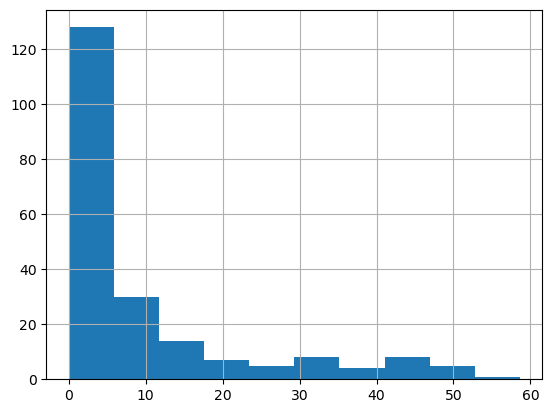

In [384]:
data_2000 = internet_df[internet_df['Year'] == '2000']
data_2000.Internet_Users_Pct.hist();

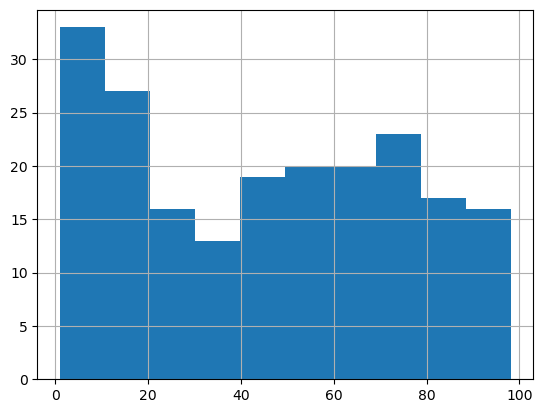

In [386]:
data_2014 = internet_df[internet_df['Year'] == '2014']
data_2014.Internet_Users_Pct.hist();

19.For how many countries was the percentage of internet users below 5% in 2014? 10

In [400]:
data_2014.loc[data_2014['Internet_Users_Pct']<5].shape[0]

10

20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

In [440]:


internet_df['Year'] = internet_df['Year'].astype(int)

internet_df.dtypes




/var/folders/0n/96_jts790qb22y30bzlhgh_m0000gn/T/ipykernel_9452/1537034963.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  internet_df['Year'] = internet_df['Year'].astype(int)


Country                object
Year                    int64
Internet_Users_Pct    float64
dtype: object

In [442]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, on=['Country', 'Year'], how='outer')

In [444]:
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,17.6
3,Afghanistan,2018,2060.698973,16.8
4,Afghanistan,2017,2096.093111,13.5


In [446]:
gdp_and_internet_use.tail()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
9107,Yemen,1999,NaN,0.056629
9108,Yemen,1998,NaN,0.023323
9109,Yemen,1997,NaN,0.015025
9110,Yemen,1996,NaN,0.000621
9111,Yemen,1990,NaN,0.000000


21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?


In [464]:
top_three_internet=gdp_and_internet_use.loc[gdp_and_internet_use['Year']==2014].nlargest (3,'Internet_Users_Pct').Country
top_three_internet

2993                        Iceland
8131    Falkland (Malvinas) Islands
687                         Bermuda
Name: Country, dtype: object

In [540]:


filtered_gdp_internet = gdp_and_internet_use[gdp_and_internet_use['Country'].isin(top_three_internet)]
internet_df.loc[internet_df.Country=='Falkland (Malvinas) Islands']

,Country,Year,Internet_Users_Pct
1891,Falkland (Malvinas) Islands,2016,99.01520
1892,Falkland (Malvinas) Islands,2015,98.30510
1893,Falkland (Malvinas) Islands,2014,97.60000
1894,Falkland (Malvinas) Islands,2013,96.90000
1895,Falkland (Malvinas) Islands,2012,96.92300
1896,Falkland (Malvinas) Islands,2011,96.38000
1897,Falkland (Malvinas) Islands,2010,95.84000
1898,Falkland (Malvinas) Islands,2009,95.84000
1899,Falkland (Malvinas) Islands,2008,92.96000
1900,Falkland (Malvinas) Islands,2007,90.06000


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

KeyError: 'y'

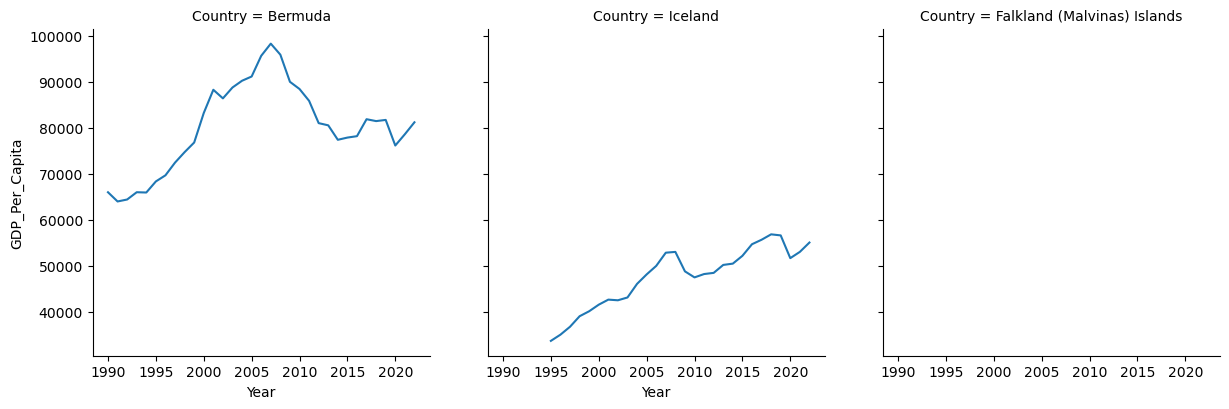

In [524]:
g = sns.FacetGrid(filtered_gdp_internet, col='Country', col_wrap=3, height=4)
g.map(sns.lineplot, 'Year', 'GDP_Per_Capita')
g.set_axis_labels('Year', 'GDP Per Capita')

plt.show()


22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.


In [550]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014]
gdp_and_internet_use_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7,Afghanistan,2014,2144.449634,7.0000
28,Africa Eastern and Southern,2014,3642.875373,NaN
61,Africa Western and Central,2014,4146.994622,NaN
94,Albania,2014,11586.817446,54.3000
127,Algeria,2014,11561.259795,29.5000
...,...,...,...,...
8954,Syrian Arab Republic,2014,NaN,28.0900
8991,Türkiye,2014,NaN,51.0374
9022,Venezuela,2014,NaN,57.0000
9049,Virgin Islands (US),2014,NaN,50.0700


In [ ]:
23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.


Text(0.5, 1.0, 'Internet_Users_Pct by GDP_Per_Capita')

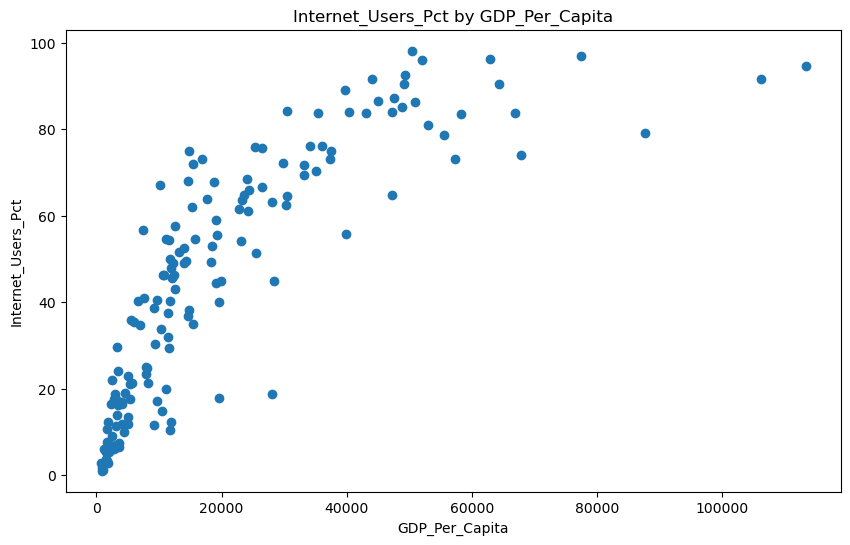

In [544]:
plt.figure(figsize=(10, 6))
plt.scatter(x = 'GDP_Per_Capita', y ='Internet_Users_Pct', data = gdp_and_internet_use_2014)
plt.xlabel('GDP_Per_Capita')
plt.ylabel('Internet_Users_Pct')
plt.title('Internet_Users_Pct by GDP_Per_Capita')

24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".
25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?

In [552]:
gdp_per_capita_2014 = gdp_df[gdp_df['Year'] == 2014]
gdp_per_capita_2014 

,Country,Year,GDP_Per_Capita
7,Afghanistan,2014,2144.449634
28,Africa Eastern and Southern,2014,3642.875373
61,Africa Western and Central,2014,4146.994622
94,Albania,2014,11586.817446
127,Algeria,2014,11561.259795
...,...,...,...
7509,Viet Nam,2014,7641.909252
7542,West Bank and Gaza,2014,5967.073437
7571,World,2014,15120.730322
7604,Zambia,2014,3375.941270


In [560]:
pd.qcut(gdp_per_capita_2014.GDP_Per_Capita, 3, labels=["low", "medium", "high"])

7          low
28         low
61         low
94      medium
127     medium
         ...  
7509    medium
7542       low
7571    medium
7604       low
7637       low
Name: GDP_Per_Capita, Length: 242, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']